In [0]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
df1 = pd.read_csv('donneesouvertes-interventions-sim_2015_now_new.csv')
df2 = pd.read_csv('donneesouvertes-interventions-sim-2005-2014.csv')

In [5]:
print(df1.shape)
print(df2.shape)

(327790, 14)
(309584, 11)


In [6]:
df_ts1 = df1[['CREATION_DATE_TIME','NOMBRE_UNITES']].copy()
df_ts2 = df2[['CREATION_DATE_TIME','NOMBRE_UNITES']].copy()

df = pd.concat([df_ts1, df_ts2])
print(df.shape)

(637374, 2)


In [7]:
df.head()

,CREATION_DATE_TIME,NOMBRE_UNITES
0,2015-01-03T20:56:02,1.0
1,2015-01-03T21:03:52,4.0
2,2015-01-03T21:07:00,1.0
3,2015-01-03T21:41:46,1.0
4,2015-01-03T21:43:32,5.0


In [0]:
df.CREATION_DATE_TIME = pd.to_datetime(df['CREATION_DATE_TIME'],  format='%Y-%m-%d %H:%M:%S')
df = df.set_index('CREATION_DATE_TIME')

In [9]:
df.dtypes

NOMBRE_UNITES    float64
dtype: object

In [10]:
df.head()

,NOMBRE_UNITES
CREATION_DATE_TIME,
2015-01-03 20:56:02,1.0
2015-01-03 21:03:52,4.0
2015-01-03 21:07:00,1.0
2015-01-03 21:41:46,1.0
2015-01-03 21:43:32,5.0


In [0]:
df_ts = df.resample('D').apply({'NOMBRE_UNITES':'count'})

In [15]:
df_ts.head()

,NOMBRE_UNITES
CREATION_DATE_TIME,
2005-01-01,196
2005-01-02,128
2005-01-03,120
2005-01-04,112
2005-01-05,106


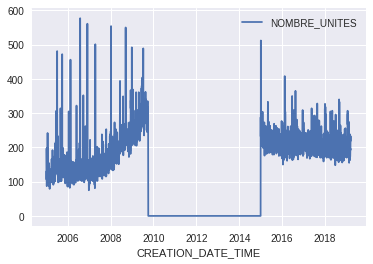

In [14]:
df_ts.plot()

In [0]:
split_change = pd.Timestamp('2008-01-01')
split_date = pd.Timestamp('2017-01-31')
end_date = pd.Timestamp('2018-12-31')
# df_ts

In [0]:
df_ts = df_ts.loc[split_change:, ['NOMBRE_UNITES']]

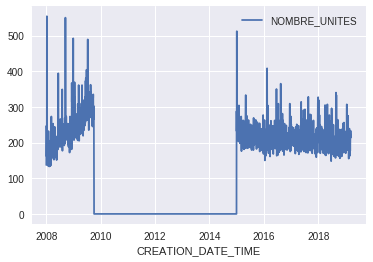

In [18]:
df_ts.plot()

In [0]:
# train on data from 2008-2016
train = df_ts.loc[:split_date, ['NOMBRE_UNITES']]

# test on data from 2017/2018
test = df_ts.loc[split_date:end_date, ['NOMBRE_UNITES']]


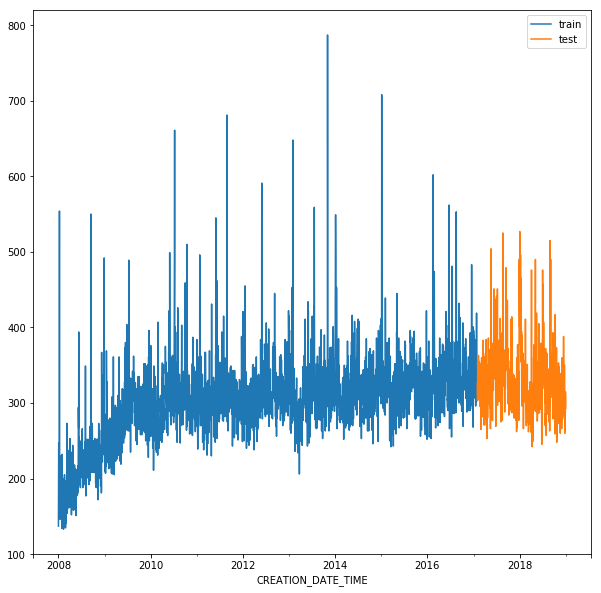

In [0]:
plt.rcParams["figure.figsize"] = (10,10)

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

# df_ts = df_ts.resample('D', on='CREATION_DATE_TIME')
# df_ts.plot()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [0]:
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [0]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import LSTM
K.set_epsilon(1)

from keras import metrics
from keras import backend

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

C:\Users\Eric\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
# Model #1: MLP 

K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mae, metrics.mse, metrics.mape, rmse] )
# model.summary()

In [0]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [0]:
history = model.fit(X_train, y_train, epochs=100,
          batch_size=2, verbose=1,
          callbacks=[early_stop],
          validation_split=0.1)

Train on 2986 samples, validate on 332 samples
Epoch 1/100
2986/2986 [==============================] - 4s 1ms/step - loss: 0.0179 - mean_absolute_error: 0.1049 - mean_squared_error: 0.0179 - mean_absolute_percentage_error: 10.4920 - rmse: 0.1049 - val_loss: 0.0060 - val_mean_absolute_error: 0.0590 - val_mean_squared_error: 0.0060 - val_mean_absolute_percentage_error: 5.9023 - val_rmse: 0.0590
Epoch 2/100
2986/2986 [==============================] - 4s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0495 - mean_squared_error: 0.0050 - mean_absolute_percentage_error: 4.9456 - rmse: 0.0495 - val_loss: 0.0045 - val_mean_absolute_error: 0.0491 - val_mean_squared_error: 0.0045 - val_mean_absolute_percentage_error: 4.9083 - val_rmse: 0.0491
Epoch 3/100
2986/2986 [==============================] - 3s 932us/step - loss: 0.0048 - mean_absolute_error: 0.0483 - mean_squared_error: 0.0048 - mean_absolute_percentage_error: 4.8315 - rmse: 0.0483 - val_loss: 0.0043 - val_mean_absolute_error: 0.0476 

2986/2986 [==============================] - 3s 961us/step - loss: 0.0043 - mean_absolute_error: 0.0457 - mean_squared_error: 0.0043 - mean_absolute_percentage_error: 4.5735 - rmse: 0.0457 - val_loss: 0.0039 - val_mean_absolute_error: 0.0450 - val_mean_squared_error: 0.0039 - val_mean_absolute_percentage_error: 4.5022 - val_rmse: 0.0450
Epoch 25/100
2986/2986 [==============================] - 4s 1ms/step - loss: 0.0043 - mean_absolute_error: 0.0456 - mean_squared_error: 0.0043 - mean_absolute_percentage_error: 4.5621 - rmse: 0.0456 - val_loss: 0.0039 - val_mean_absolute_error: 0.0455 - val_mean_squared_error: 0.0039 - val_mean_absolute_percentage_error: 4.5506 - val_rmse: 0.0455
Epoch 26/100
2986/2986 [==============================] - 3s 911us/step - loss: 0.0043 - mean_absolute_error: 0.0456 - mean_squared_error: 0.0043 - mean_absolute_percentage_error: 4.5554 - rmse: 0.0456 - val_loss: 0.0039 - val_mean_absolute_error: 0.0450 - val_mean_squared_error: 0.0039 - val_mean_absolute_per

In [0]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])

# plt.title('model percent error')
plt.ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X_test)
# print(y_test, y_pred)

In [0]:
scores = model.evaluate(X_test, y_test, verbose=1)
print(history.history.keys())
# Mean Absolute Percentage Error
print(scores[3])

In [0]:
plt.plot(y_test, color='g') # real
plt.plot(y_pred, color='b') # predicted
plt.legend(['Test', 'Pred'], loc='upper left')

In [0]:
# RNN with LSTM - no window
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [0]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 1)))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mae, metrics.mse, metrics.mape, rmse])

In [0]:
history = model.fit(X_train_t, y_train,
          epochs=200, batch_size=1, verbose=1,
          callbacks=[early_stop],
          validation_split=0.1)


In [0]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])

# plt.title('model percent error')
plt.ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X_test_t)
# print(y_test, y_pred)

scores = model.evaluate(X_test_t, y_test, verbose=1)
print(history.history.keys())

# Mean Absolute Percentage Error
print(scores[3])

In [0]:
plt.plot(y_test, color='g') # real
plt.plot(y_pred, color='b') # predicted
plt.legend(['Test', 'Pred'], loc='upper left')

In [0]:
# MLP - with window 

train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()


In [0]:
for s in range(1, 7):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [0]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [0]:
X_train.head()

In [0]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [0]:
K.clear_session()

model = Sequential()
model.add(Dense(16, input_dim=6, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mae, metrics.mse, metrics.mape, rmse])
model.summary()

In [0]:
history = model.fit(X_train, y_train, epochs=200,
          batch_size=1, verbose=1, callbacks=[early_stop], validation_split=0.1)

In [0]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])

# plt.title('model percent error')
plt.ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X_test)
# print(y_test, y_pred)

scores = model.evaluate(X_test, y_test, verbose=1)
print(history.history.keys())
# Mean Absolute Percentage Error
print(scores[3])

In [0]:
plt.plot(y_test, color='g') # real
plt.plot(y_pred, color='b') # predicted
plt.legend(['Test', 'Pred'], loc='upper left')

In [0]:
# RNN - window with LSTM

X_train_t = X_train.reshape(X_train.shape[0], 1, 6)
X_test_t = X_test.reshape(X_test.shape[0], 1, 6)


In [0]:
X_train_t.shape

In [0]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 6)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mae, metrics.mse, metrics.mape, rmse])

In [0]:
# model.summary()

In [0]:
history = model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop], validation_split=0.1)

In [0]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])

# plt.title('model percent error')
plt.ylabel('Mean Absolute Percentage Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X_test_t)
# print(y_test, y_pred)

scores = model.evaluate(X_test_t, y_test, verbose=1)
print(history.history.keys())
# Mean Absolute Percentage Error
print(scores[3])

In [0]:
plt.plot(y_test, color='g') # real
plt.plot(y_pred, color='b') # predicted
plt.legend(['Test', 'Pred'], loc='upper left')